Nama : Simen Ferdinand Djamhari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

Import Library yang akan dipakai

In [2]:
data = pd.read_csv('insurance.csv')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
5,31,0,25.740,8005,0,0,2,3756.62160,0
6,46,0,33.440,3002,1,0,2,8240.58960,1
7,37,0,27.740,8007,3,0,1,7281.50560,0
8,37,1,29.830,8002,2,0,0,6406.41070,0
9,60,0,25.840,5008,0,0,1,28923.13692,0


Membaca data insurance. Lalu melihat 15 teratas

In [3]:
data.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Mengecek apakah ad datan yang kosong

<AxesSubplot:>

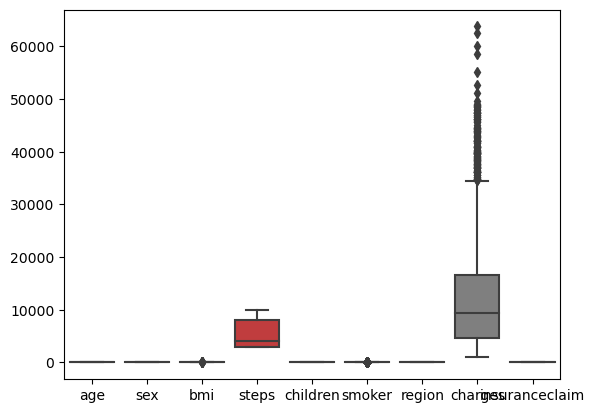

In [4]:
sns.boxplot(data=data)

# B

Adanya masalah di dalam data yang diambil. Bila kita lihat outlier, akan terlihat kalau banyak adanya outlier. Cara termudah untuk mengatasi hal itu adalah dengan membuang outlier menggunakan teknik seperti IQR

In [5]:
X = data.drop('insuranceclaim', axis=1)
y = data['insuranceclaim']

scaler = StandardScaler()
X = scaler.fit_transform(X)

Membagi data menjadi X dan y

In [6]:
#Split data inti 80% train, 10% test, 10% validation
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 34)

testing_X, valid_X, testing_y, valid_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 34)

Membagi data dengan Validasi 80%, test 10% dan validasi 10%

# C

In [7]:
n = train_X.shape[1]
n_class = len(np.unique(train_y))

model = keras.Sequential([
    keras.layers.Dense(2 * n, input_shape = (n,), activation='relu'),
    keras.layers.Dense(2 * n, activation='relu'),
    keras.layers.Dense(n_class, activation='sigmoid')
])

In [8]:
#n

In [9]:
#n_class

In [10]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_X, train_y, epochs = 50, validation_data = (valid_X, valid_y))

Epoch 1/50
34/34 [==============================] - 1s 5ms/step - loss: 0.6834 - accuracy: 0.5645 - val_loss: 0.5976 - val_accuracy: 0.7239
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5825 - accuracy: 0.6944 - val_loss: 0.5110 - val_accuracy: 0.7612
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7533 - val_loss: 0.4455 - val_accuracy: 0.7836
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7897 - val_loss: 0.4014 - val_accuracy: 0.8284
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8234 - val_loss: 0.3673 - val_accuracy: 0.8582
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8495 - val_loss: 0.3393 - val_accuracy: 0.8731
Epoch 7/50
34/34 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.8692 - val_loss: 0.3166 - val_accuracy: 0.8881
Epoch 8/50
34/34 [==

Text(0, 0.5, 'Loss')

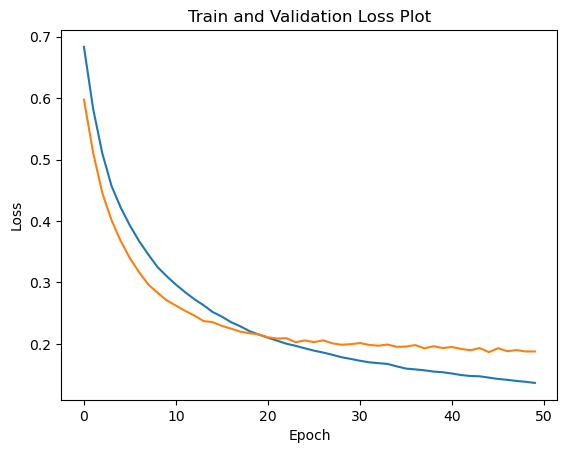

In [12]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.argmax(model.predict(testing_X), axis=1).round()
accuracy = accuracy_score(testing_y, test_predictions)
print("Accuracy: {}".format(accuracy), "\n")

print(classification_report(testing_y, test_predictions))

5/5 [==============================] - 0s 750us/step
Accuracy: 0.9104477611940298 

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.94      0.92      0.93        87

    accuracy                           0.91       134
   macro avg       0.90      0.91      0.90       134
weighted avg       0.91      0.91      0.91       134



Membuat arsitektur suai dengan soal, lalu mengecek report menggunakan calssification_report yang akan nanti dibandingkan dengan setelah dimodifikasi

# D

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_dim = 8, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_X, train_y, epochs = 150, batch_size =  40, validation_data = (testing_X, testing_y))

Epoch 1/150
27/27 [==============================] - 0s 4ms/step - loss: 0.7458 - accuracy: 0.4897 - val_loss: 0.7093 - val_accuracy: 0.4627
Epoch 2/150
27/27 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.5944 - val_loss: 0.6316 - val_accuracy: 0.6642
Epoch 3/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7150 - val_loss: 0.5729 - val_accuracy: 0.7761
Epoch 4/150
27/27 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7701 - val_loss: 0.5320 - val_accuracy: 0.8060
Epoch 5/150
27/27 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7841 - val_loss: 0.4992 - val_accuracy: 0.8060
Epoch 6/150
27/27 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7804 - val_loss: 0.4723 - val_accuracy: 0.8060
Epoch 7/150
27/27 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7897 - val_loss: 0.4488 - val_accuracy: 0.8209
Epoch 8/150
2

Epoch 59/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9346 - val_loss: 0.2371 - val_accuracy: 0.8955
Epoch 60/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9336 - val_loss: 0.2352 - val_accuracy: 0.9104
Epoch 61/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 0.9374 - val_loss: 0.2349 - val_accuracy: 0.9104
Epoch 62/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.9364 - val_loss: 0.2341 - val_accuracy: 0.8955
Epoch 63/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9346 - val_loss: 0.2344 - val_accuracy: 0.8955
Epoch 64/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.9355 - val_loss: 0.2321 - val_accuracy: 0.8881
Epoch 65/150
27/27 [==============================] - 0s 1ms/step - loss: 0.1706 - accuracy: 0.9355 - val_loss: 0.2309 - val_accuracy: 0.9030
Epoch 

Text(0, 0.5, 'Loss')

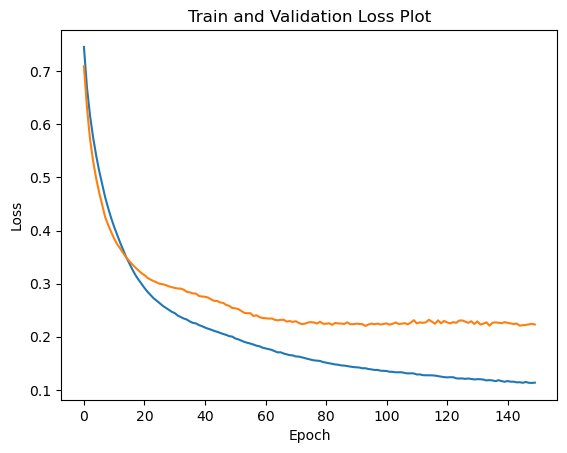

In [17]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.argmax(model.predict(test_X), axis=1).round()

accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy), "\n")

print(classification_report(test_y, test_predictions))

9/9 [==============================] - 0s 500us/step
Accuracy: 0.9029850746268657 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.93      0.91      0.92       161

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



Mengganti arsitektur n * 2 dengan angka yang lain seperti 10 dan menambahkan  batch_size dengan jumlah 40. Dengan menambahkan batch_size bisa mengecek beberapa sample sekaligus sehinga lebih cepat dan efisien. Epoch juga ditambahkan dari 50 ke 150. Dengan menambahkan epoch, model machine learning dapat mempelajari pola dengna lebih mudah

# E

Bisa dilihat dari kedua model, setelah diganti beberapa angka di arsitektur dan ditambahkan batch_size dan ditambahkan jumlah epoch, hasil akurasinya meningkat dari 0.89 menjadi 0.92. Nilai presisi recall dan F1-score juga lebih besar dibandingkan sebelumnya. Hal ini menandakan kalau perubahan yang dilakukan memperbagus baseline arsitektur yang sudah dibuat.